In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
import os
import cv2

%matplotlib inline
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/malware/dataset_9010/dataset_9010/malimg_dataset/train")

Found 8510 files belonging to 25 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/malware/validation_ds_update_924/validation_ds_update_924/malimg_dataset/validation')

Found 924 files belonging to 25 classes.


In [ ]:
classes=val_ds.class_names

In [ ]:
classes[14]

'Lolyda.AA3'

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=25,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(25, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dense_3 (Dense)             (None, 25)                1625      
                                                                 
Total params: 23,720,473
Trainable params: 132,761
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
resnet_model.fit(train_ds,  epochs=2)

Epoch 1/2
266/266 [==============================] - 41s 142ms/step - loss: 0.3198 - accuracy: 0.9163
Epoch 2/2
266/266 [==============================] - 37s 137ms/step - loss: 0.0940 - accuracy: 0.9703


In [ ]:
resnet_model.evaluate(val_ds)

29/29 [==============================] - 6s 145ms/step - loss: 0.1524 - accuracy: 0.9459


[0.15237130224704742, 0.9458874464035034]

In [ ]:
import tensorflow as tf
from google.colab import files


# Specify export directory and use tensorflow to save your_model
export_dir = './saved_model'
tf.saved_model.save(resnet_model export_dir=export_dir)

SyntaxError: ignored

In [ ]:
files.download('resnet_model.h5')

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
loaded_model=load_model('resnet50.h5')

OSError: ignored

In [ ]:
x=loaded_model.predict(val_ds)

29/29 [==============================] - 217s 7s/step


In [ ]:
predicted_values=[np.argmax(i) for i in x]

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = loaded_model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 7s 7s/step


In [ ]:
len(predicted_labels)

924

In [ ]:
for i in range(len(predicted_labels)):
    print("Actual  =  "+classes[correct_labels[i]]+"  ,Predicted   =  "+classes[predicted_labels[i]])

Actual  =  Fakerean  ,Predicted   =  Fakerean
Actual  =  Autorun.K  ,Predicted   =  Yuner.A
Actual  =  Lolyda.AT  ,Predicted   =  Lolyda.AT
Actual  =  Instantaccess  ,Predicted   =  Instantaccess
Actual  =  Allaple.A  ,Predicted   =  Allaple.A
Actual  =  Fakerean  ,Predicted   =  Fakerean
Actual  =  Dialplatform.B  ,Predicted   =  Dialplatform.B
Actual  =  Lolyda.AA3  ,Predicted   =  Lolyda.AA3
Actual  =  Alueron.gen!J  ,Predicted   =  Alueron.gen!J
Actual  =  Agent.FYI  ,Predicted   =  Agent.FYI
Actual  =  Yuner.A  ,Predicted   =  Yuner.A
Actual  =  Allaple.A  ,Predicted   =  Allaple.A
Actual  =  Fakerean  ,Predicted   =  Fakerean
Actual  =  Allaple.L  ,Predicted   =  Allaple.L
Actual  =  Allaple.A  ,Predicted   =  Allaple.A
Actual  =  Dontovo.A  ,Predicted   =  Dontovo.A
Actual  =  Wintrim.BX  ,Predicted   =  Wintrim.BX
Actual  =  Instantaccess  ,Predicted   =  Instantaccess
Actual  =  Agent.FYI  ,Predicted   =  Agent.FYI
Actual  =  Fakerean  ,Predicted   =  Fakerean
Actual  =  Insta

In [ ]:
classes[correct_labels[0]]

'Fakerean'

In [ ]:
correct_labels

<tf.Tensor: shape=(924,), dtype=int32, numpy=
array([10,  5, 15, 11,  2, 10,  8, 14,  4,  1, 24,  2, 10,  3,  2,  9, 23,
       11,  1, 10, 11, 18,  3, 17,  3,  0,  4, 12,  1,  3,  2, 12, 12,  9,
        7,  3, 11, 16,  1, 10, 13, 22,  3, 11,  0,  9,  2,  3, 10,  2, 11,
       11,  2,  8,  3,  2, 24, 22,  9, 17, 18, 14,  0, 10, 21, 10,  2, 12,
        2, 10, 15,  1, 20, 11,  3, 10, 14, 23,  4, 10,  2, 24, 10, 19, 23,
       20, 11,  3,  3, 13,  2, 24,  6,  7, 10, 11, 11,  2, 14,  2, 24, 24,
       23,  4,  1, 21,  1,  0,  7, 18, 13, 12,  7,  3, 10, 21, 14, 16, 10,
        1,  0, 22, 12,  5,  2, 20,  2,  3, 11, 11,  2, 20,  2, 20, 11, 11,
        3,  2, 11, 13,  2, 18,  3, 19,  3, 20,  2,  3, 13,  2, 14,  3,  8,
       10,  4,  0, 11,  3,  6, 11, 10, 10, 12, 21, 10,  2, 12, 21,  3, 23,
        5,  9,  6,  2, 13, 22,  4, 12, 19,  2,  3, 11,  3,  6, 24, 11, 10,
       11, 11, 11,  1, 16,  5, 20, 11, 19, 16, 21, 23,  9,  6,  6, 22, 12,
        3, 10, 14, 23, 19, 12,  2,  3, 11,  2, 23, 22,

In [ ]:
confmat=tf.math.confusion_matrix(labels=correct_labels,predictions=predicted_labels)
confmat

<tf.Tensor: shape=(25, 25), dtype=int32, numpy=
array([[ 25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 114,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,  24,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25],
       [  0,   0,   0,   0,   0,   0,  22,   3,   0,   0,   0,   0,   0,
          0,   0,   0,   0,

Text(69.0, 0.5, 'Truth')

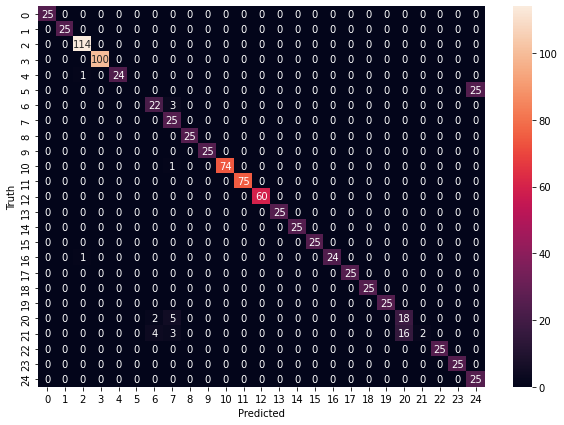

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confmat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
loaded_model.evaluate(val_ds)

29/29 [==============================] - 210s 7s/step - loss: 0.1688 - accuracy: 0.9340


[0.1688179224729538, 0.9339826703071594]